# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    niter = 0

    for i in range(maxiter):
        fx = f(x)
        fpx = fder(x)

        # Check if derivative is zero (avoid division by zero)
        if abs(fpx) < 1e-15:
            print(f"Warning: Derivative is near zero at x = {x}")
            break

        # Newton's iteration formula: x_{n+1} = x_n - f(x_n)/f'(x_n)
        x_new = x - fx / fpx
        niter += 1

        # Check for convergence
        if abs(x_new - x) < eps:
            return x_new, niter

        x = x_new

    print(f"Warning: Maximum iterations ({maxiter}) reached without convergence")
    return x, niter

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):

    x = x0
    niter = 0

    for i in range(maxiter):
        fx = f(x)
        fpx = fder(x)

        # Check if derivative is zero (avoid division by zero)
        if abs(fpx) < 1e-15:
            print(f"Warning: Derivative is near zero at x = {x}")
            break

        # Newton's iteration formula: x_{n+1} = x_n - f(x_n)/f'(x_n)
        x_new = x - fx / fpx
        niter += 1

        # Check for convergence
        if abs(x_new - x) < eps:
            return x_new, niter

        x = x_new

    print(f"Warning: Maximum iterations ({maxiter}) reached without convergence")
    return x, niter

# Example: f(x) = x^2 - 1, f'(x) = 2x
def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

# Test the implementation starting from x0 = 2
root, niter = newton_iteration(f, fder, x0=2)
print(f"Root found: {root:.6f} in {niter} iterations (starting from x0=2)")

# Test the implementation starting from x0 = -2
root_neg, niter_neg = newton_iteration(f, fder, x0=-2)
print(f"Root found: {root_neg:.6f} in {niter_neg} iterations (starting from x0=-2)")

Root found: 1.000000 in 5 iterations (starting from x0=2)
Root found: -1.000000 in 5 iterations (starting from x0=-2)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [3]:
def modified_newton_iteration(f, fder, x0, m=1, eps=1e-5, maxiter=1000):

    x = x0
    niter = 0

    for i in range(maxiter):
        fx = f(x)
        fpx = fder(x)

        if abs(fpx) < 1e-15:
            print(f"Warning: Derivative is near zero at x = {x}")
            break

        x_new = x - m * fx / fpx
        niter += 1

        if abs(x_new - x) < eps:
            return x_new, niter

        x = x_new

    print(f"Warning: Maximum iterations ({maxiter}) reached without convergence")
    return x, niter

# Function with multiple root: f(x) = (x^2 - 1)^2
def f(x):
    return (x**2 - 1)**2

# Derivative: f'(x) = 4x(x^2 - 1)
def fder(x):
    return 4 * x * (x**2 - 1)


x0 = 1.5
eps = 1e-5

results = []
for m in [1, 2, 3, 4, 5]:
    root, niter = modified_newton_iteration(f, fder, x0, m=m, eps=eps)
    results.append((m, root, niter))

print("m\tRoot\t\tIterations")
for m, root, niter in results:
    print(f"{m}\t{root:.6f}\t{niter}")


m	Root		Iterations
1	1.000006	17
2	1.000000	4
3	0.999998	17
4	1.500000	1000
5	-1.764472	1000


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

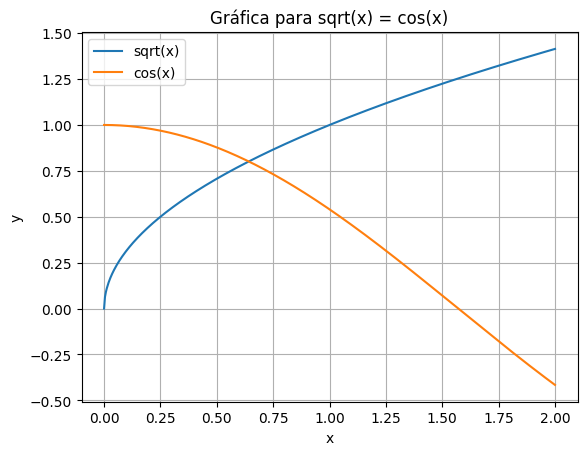

Raíz punto fijo: 0.641719 en 224 iteraciones (desde x0=0.7)
Alpha	Raíz		Iteraciones
0.20	0.641744	27
0.50	0.641719	10
0.80	0.641714	4
1.00	0.641713	7
1.20	0.641711	13
Estimado m = 1.2101, M = 1.3415, alpha óptimo ≈ 0.7838
Alpha óptimo	0.641715	4 iteraciones


In [4]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2, 500)
lhs = np.sqrt(x)
rhs = np.cos(x)

plt.plot(x, lhs, label='sqrt(x)')
plt.plot(x, rhs, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica para sqrt(x) = cos(x)')
plt.legend()
plt.grid(True)
plt.show()


def fixed_point_iteration(g, x0, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        x_new = g(x)
        if abs(x_new - x) < eps:
            return x_new, i+1
        x = x_new
    print("Advertencia: se alcanzó el máximo de iteraciones.")
    return x, maxiter

def g(x):
    return np.cos(x)**2

root_fp, niter_fp = fixed_point_iteration(g, x0=0.7)
print(f"Raíz punto fijo: {root_fp:.6f} en {niter_fp} iteraciones (desde x0=0.7)")


def f(x):
    return np.sqrt(x) - np.cos(x)

def relaxed_fixed_point(x0, alpha, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        x_new = x - alpha * f(x)
        if abs(x_new - x) < eps:
            return x_new, i+1
        x = x_new
    print(f"Advertencia: alpha={alpha}: máximo de iteraciones alcanzado.")
    return x, maxiter

alphas = [0.2, 0.5, 0.8, 1.0, 1.2]
print("Alpha\tRaíz\t\tIteraciones")
for alpha in alphas:
    root_alpha, niter_alpha = relaxed_fixed_point(x0=0.7, alpha=alpha)
    print(f"{alpha:.2f}\t{root_alpha:.6f}\t{niter_alpha}")


def fder(x):
    return 0.5 / np.sqrt(x) + np.sin(x)

xs = np.linspace(0.6, 1.0, 100)
ders = np.abs(fder(xs))
m = np.min(ders)
M = np.max(ders)
alpha_opt = 2 / (m + M)
print(f"Estimado m = {m:.4f}, M = {M:.4f}, alpha óptimo ≈ {alpha_opt:.4f}")

# Test con alpha óptimo
root_opt, niter_opt = relaxed_fixed_point(x0=0.7, alpha=alpha_opt)
print(f"Alpha óptimo\t{root_opt:.6f}\t{niter_opt} iteraciones")

# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

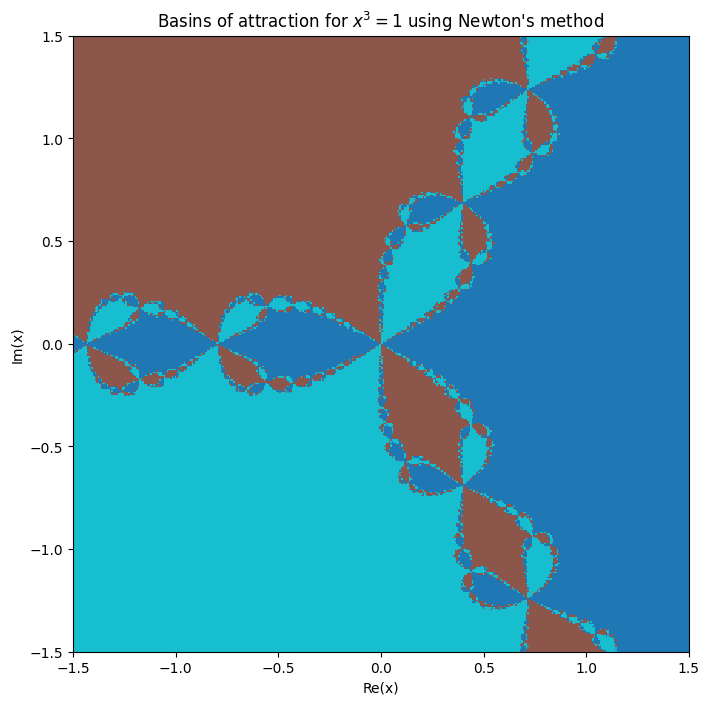

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's iteration for f(x) = x^3 - 1
def newton_cubic(x0, eps=1e-5, maxiter=50):
    x = x0
    for i in range(maxiter):
        fx = x**3 - 1
        fpx = 3 * x**2
        # Avoid division by zero
        if abs(fpx) < 1e-14:
            break
        x_new = x - fx / fpx
        if abs(x_new - x) < eps:
            return x_new
        x = x_new
    return x


roots = np.array([np.exp(1j * 2 * np.pi * k / 3) for k in range(3)])

def which_root(z):
    return np.argmin(np.abs(roots - z))

# Grid parameters
N = 400
re = np.linspace(-1.5, 1.5, N)
im = np.linspace(-1.5, 1.5, N)
RE, IM = np.meshgrid(re, im)
Z0 = RE + 1j * IM

basin = np.zeros_like(RE, dtype=int)

for i in range(N):
    for j in range(N):
        z0 = Z0[i, j]
        z = newton_cubic(z0)
        basin[i, j] = which_root(z)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(basin, extent=[re[0], re[-1], im[0], im[-1]], origin='lower',
           cmap=plt.cm.tab10, interpolation='nearest')
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title('Basins of attraction for $x^3 = 1$ using Newton\'s method')
plt.show()